In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch

device = torch.device('cpu')

# ODE vector field visualizations
This notebook shows examples of functions Neural ODEs cannot approximate and how this affects the learned vector fields.

#### Create an ODE function

In [2]:
from anode.models import ODEFunc

data_dim = 1  # We model 1d data to easily visualize it
hidden_dim = 16

# Create a 3-layer MLP as the ODE function f(h, t)
odefunc = ODEFunc(device, data_dim, hidden_dim, time_dependent=True)

#### Visualize vector field of ODE function
We can visualize what the randomly initialized ODE function's vector field looks like.

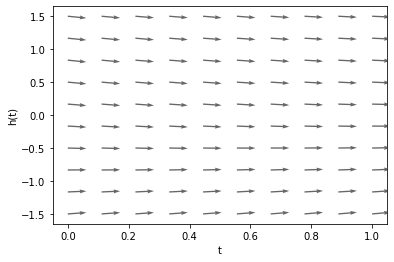

In [3]:
from viz.plots import vector_field_plt

vector_field_plt(odefunc, num_points=10, timesteps=10, 
                 h_min=-1.5, h_max=1.5)

## Create functions to approximate

We will approximate two functions: an easy one (the identity mapping) and a hard one (correspond to g_1d in the paper)

In [4]:
from experiments.dataloaders import Data1D
from torch.utils.data import DataLoader

data_easy = Data1D(num_points=500, target_flip=False)
data_hard = Data1D(num_points=500, target_flip=True)

dataloader_easy = DataLoader(data_easy, batch_size=32, shuffle=True)
dataloader_hard = DataLoader(data_hard, batch_size=32, shuffle=True)

#### Visualize the data

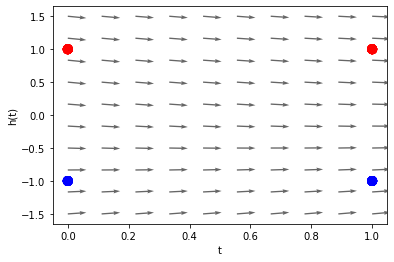

In [5]:
for inputs, targets in dataloader_easy:
    break

vector_field_plt(odefunc, num_points=10, timesteps=10,
                 inputs=inputs, targets=targets,
                 h_min=-1.5, h_max=1.5)

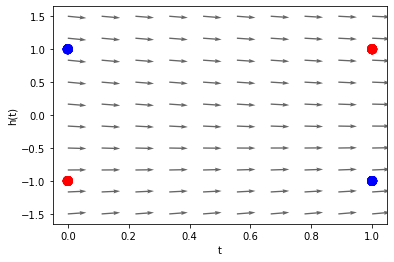

In [6]:
for inputs, targets in dataloader_hard:
    break

vector_field_plt(odefunc, num_points=10, timesteps=10,
                 inputs=inputs, targets=targets,
                 h_min=-1.5, h_max=1.5)

## Train a model on data

We can now try to fit a Neural ODE to the two functions

In [7]:
from anode.models import ODEBlock
from anode.training import Trainer

data_dim = 1
hidden_dim = 16

# Create a model for the easy function
odefunc_easy = ODEFunc(device, data_dim, hidden_dim, 
                       time_dependent=True)
model_easy = ODEBlock(device, odefunc_easy)

# Create a model for the hard function
odefunc_hard = ODEFunc(device, data_dim, hidden_dim, 
                       time_dependent=True)
model_hard = ODEBlock(device, odefunc_hard)

# Create an optimizer and trainer for easy function
optimizer_easy = torch.optim.Adam(model_easy.parameters(), lr=1e-3)
trainer_easy = Trainer(model_easy, optimizer_easy, device, print_freq=5)

# Create an optimizer and trainer for hard function
optimizer_hard = torch.optim.Adam(model_hard.parameters(), lr=5e-4)
trainer_hard = Trainer(model_hard, optimizer_hard, device, print_freq=5)

#### Train model on easy data

In [8]:
trainer_easy.train(dataloader_easy, num_epochs=10)


Iteration 0/16
Loss: 0.010
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 0.003
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 0.002
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 0.001
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 1: 0.003

Iteration 0/16
Loss: 0.001
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 2: 0.000

Iteration 0/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 3: 0.000

Iteration 0/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 4: 0.000

Ite

#### Visualize model trajectories
As can be seen, the learned vector field maps the inputs to targets correctly.

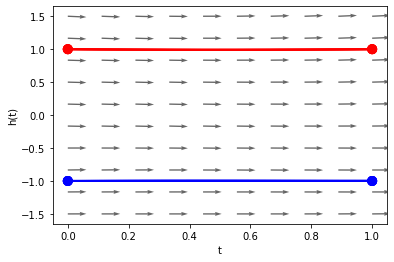

In [9]:
for inputs, targets in dataloader_easy:
    break

# Plot 8 trajectories
vector_field_plt(odefunc_easy, num_points=10, timesteps=10,
                 inputs=inputs[:8], targets=targets[:8],
                 h_min=-1.5, h_max=1.5, model=model_easy)

#### Train model on hard data

In [10]:
trainer_hard.train(dataloader_hard, num_epochs=50)


Iteration 0/16
Loss: 1.512
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 1.479
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 1.481
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 1.438
NFE: 20
BNFE: 0
Total NFE: 20
Epoch 1: 1.470

Iteration 0/16
Loss: 1.464
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 1.439
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 1.415
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 1.428
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 2: 1.447

Iteration 0/16
Loss: 1.439
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 1.389
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 1.430
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 1.412
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 3: 1.421

Iteration 0/16
Loss: 1.410
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 1.384
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/16
Loss: 1.397
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 15/16
Loss: 1.405
NFE: 20
BNFE: 0
Total NFE: 20
Epoch 4: 1.390

Ite


Iteration 5/16
Loss: 0.526
NFE: 44
BNFE: 0
Total NFE: 44

Iteration 10/16
Loss: 0.538
NFE: 44
BNFE: 0
Total NFE: 44

Iteration 15/16
Loss: 0.525
NFE: 44
BNFE: 0
Total NFE: 44
Epoch 34: 0.523

Iteration 0/16
Loss: 0.496
NFE: 38
BNFE: 0
Total NFE: 38

Iteration 5/16
Loss: 0.536
NFE: 44
BNFE: 0
Total NFE: 44

Iteration 10/16
Loss: 0.530
NFE: 44
BNFE: 0
Total NFE: 44

Iteration 15/16
Loss: 0.571
NFE: 38
BNFE: 0
Total NFE: 38
Epoch 35: 0.522

Iteration 0/16
Loss: 0.512
NFE: 44
BNFE: 0
Total NFE: 44

Iteration 5/16
Loss: 0.517
NFE: 44
BNFE: 0
Total NFE: 44

Iteration 10/16
Loss: 0.506
NFE: 38
BNFE: 0
Total NFE: 38

Iteration 15/16
Loss: 0.522
NFE: 44
BNFE: 0
Total NFE: 44
Epoch 36: 0.519

Iteration 0/16
Loss: 0.522
NFE: 44
BNFE: 0
Total NFE: 44

Iteration 5/16
Loss: 0.506
NFE: 38
BNFE: 0
Total NFE: 38

Iteration 10/16
Loss: 0.526
NFE: 44
BNFE: 0
Total NFE: 44

Iteration 15/16
Loss: 0.529
NFE: 44
BNFE: 0
Total NFE: 44
Epoch 37: 0.518

Iteration 0/16
Loss: 0.520
NFE: 44
BNFE: 0
Total NFE: 44


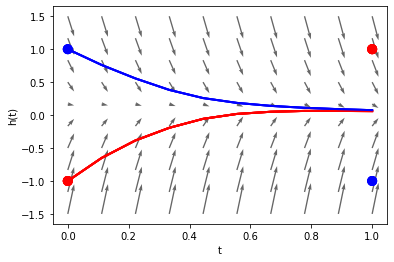

In [11]:
for inputs, targets in dataloader_hard:
    break

# Plot 8 trajectories
vector_field_plt(odefunc_hard, num_points=10, timesteps=10,
                 inputs=inputs[:8], targets=targets[:8],
                 h_min=-1.5, h_max=1.5, model=model_hard)

## Augmented Neural ODEs
As can be seen, Neural ODEs struggle to fit the hard function. In fact, it can be proven that Neural ODEs cannot represent this function. In order to overcome this, we can use Augmented Neural ODEs which extend the space on which the ODE is solved. Examples of this are shown in the `augmented-neural-ode-example` notebook.